In [1]:
from greenMLAnalysis import greenMLAnalysis
from blueMLAnalysis import blueMLAnalysis
import os
from tensorflow.keras import models, optimizers, layers, metrics

2023-07-22 19:47:25.816115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Making a Neural Network

Use the following code to create a neural network from scratch. I found this architecture to work particularly well for training on green imaging data. Note that you may need to adjust the input shape if the input image changes shape.

If crops are of the wrong size, you can change the `separation` key word argument in the `train_model` method of either analysis class.

In [4]:
model_path = os.path.join("example_models", "green_model.h5")

In [ ]:
network = models.Sequential()
network.add(layers.Input(shape=(17, 17, 1))) # Usually the input is 17 x 17 px
network.add(layers.RandomFlip())
network.add(layers.RandomBrightness(0.2, (0, 500)))
network.add(layers.RandomContrast(0.2))
network.add(layers.Normalization())
network.add(layers.Conv2D(16, 3, strides=1, activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
network.add(layers.Conv2D(8, 3, strides=1, activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.Flatten())
network.add(layers.Dense(2, activation='sigmoid'))

network.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy',
               metrics=['binary_accuracy'])
network.save(model_path)


# Green Analysis Demo

In [8]:
data_path = os.path.join("example_data", "green_training")
n_tweezers = 50
n_loops = 20

In [9]:
analysis = greenMLAnalysis(n_tweezers, n_loops, model_path, make_plots=True, r_atom=2.5)

/Users/jackmango/Desktop/QUIRP - Work/MLAnalysis/datasetUtilities/Labeler.py:196: AnalysisWarning: 'Tweezer 36 threshold too low! No dark images!'
  warnings.warn(f"Tweezer {i} threshold too low! No dark images!", AnalysisWarning)
/Users/jackmango/Desktop/QUIRP - Work/MLAnalysis/datasetUtilities/Labeler.py:196: AnalysisWarning: 'Tweezer 39 threshold too low! No dark images!'
  warnings.warn(f"Tweezer {i} threshold too low! No dark images!", AnalysisWarning)


Epoch 1/8


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 17, 17, 1), found shape=(None, 21, 21)


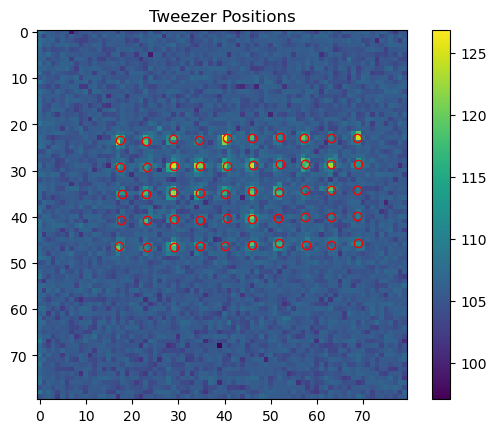

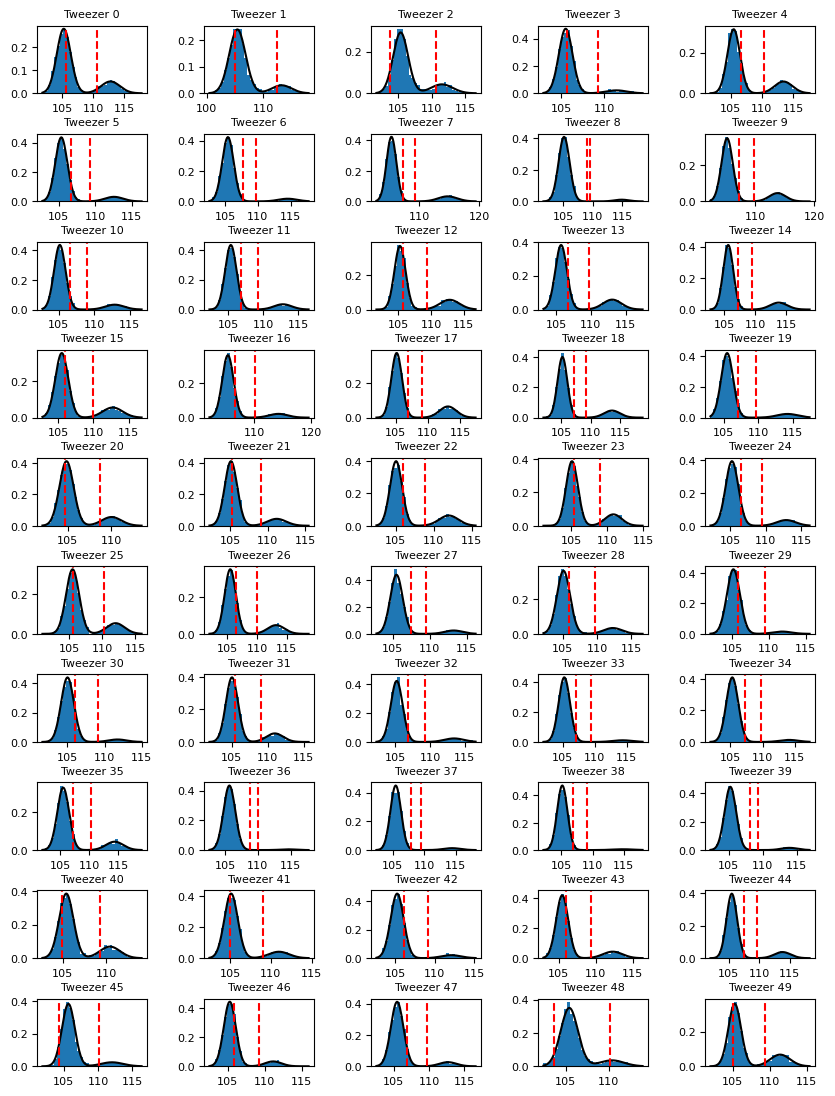

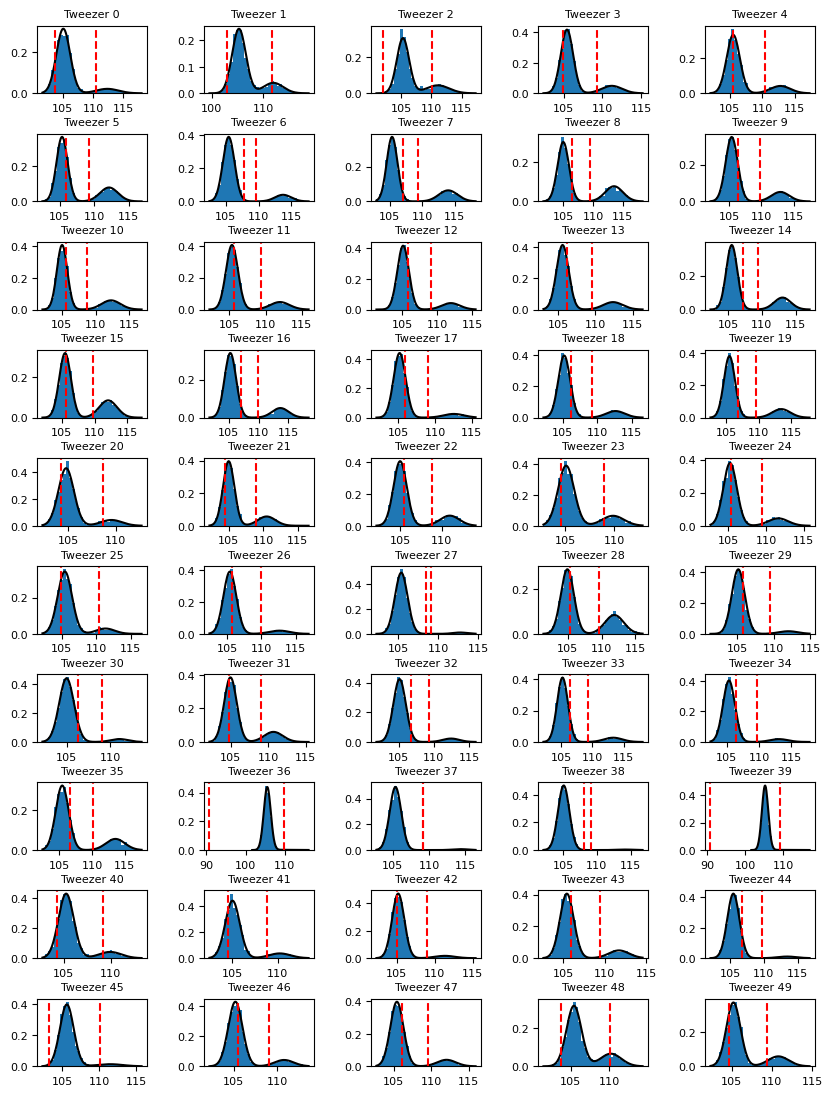

In [11]:
analysis.train_model(data_path, model_path=model_path)

In [7]:
positions, p_db, p_bd, fig = analysis.fidelity_analysis(data_path)

NameError: name 'analysis' is not defined

# Blue Analysis Demo

The neural network architecture below seems to work particularly well for blue imaging. 

In [2]:
model_path = os.path.join("example_models", "blue_model.h5")

In [ ]:
network = models.Sequential()
network.add(layers.Input(shape=(17, 17, 1))) # Usually the input is 17 x 17 px
network.add(layers.RandomFlip())
network.add(layers.Normalization())
network.add(layers.Conv2D(32, 3, strides=1, activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
network.add(layers.Conv2D(16, 3, strides=1, activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.Flatten())
network.add(layers.Dense(2, activation='sigmoid'))

network.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy',
               metrics=['binary_accuracy'])
network.save(model_path)

In [3]:
data_path = os.path.join("example_data", "blue_training")
green_model_path = os.path.join("example_models", "green_model.h5")
blue_model_path = model_path = os.path.join("example_models", "blue_model.h5")

In [4]:
analysis = blueMLAnalysis(100, blue_model_path, make_plots=False)

22500/22500 [==============================] - 55s 2ms/step
Epoch 1/16


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 17, 17, 1), found shape=(32, 21, 21)


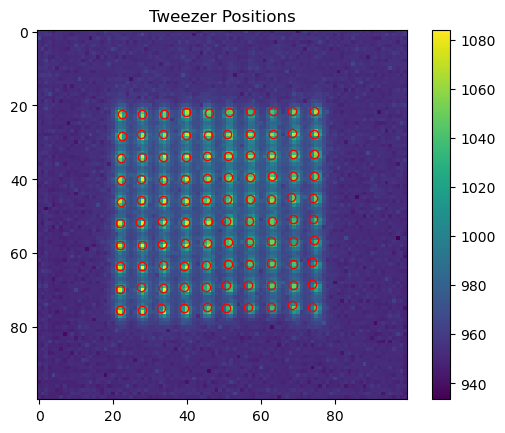

In [6]:
analysis.train_model(data_path, green_model_path)